<a href="https://colab.research.google.com/github/Aboubacar2012/ML_Project/blob/main/Kidney_desease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-- Importing librairies

Probleme Statement : 
1- Analysing distribution of each and every numerica column.
2- Check label distribution of Categorical data.

In [318]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [319]:
df=pd.read_csv('/content/drive/MyDrive/ml_data/supervised_learning/classification /Kidney_desease/kidney_disease.csv')

In [320]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [321]:
description=pd.read_csv('/content/drive/MyDrive/ml_data/supervised_learning/classification /Kidney_desease/data_description.txt', sep='-')
description

,1. Features:
id,id
age,age
bp,blood pressure
sg,specific gravity
al,albumin
su,sugar
rbc,red blood cells
pc,pus cell
pcc,pus cell clumps
ba,bacteria


In [322]:
description.reset_index()

,index,1. Features:
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [323]:
description.columns=['colunms_names']

In [324]:
df.columns=description['colunms_names'].values

In [325]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [326]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [327]:
df['packed cell volume'].head()

0    44
1    38
2    31
3    32
4    35
Name: packed cell volume, dtype: object

In [328]:
#Let's convert some feature into numeric
df["packed cell volume"] = pd.to_numeric(df["packed cell volume"], errors='coerce')
df["white blood cell count"] = pd.to_numeric(df["white blood cell count"], errors='coerce')
df["red blood cell count"] = pd.to_numeric(df["red blood cell count"], errors='coerce')

In [329]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [330]:
df.shape

(400, 26)

In [331]:
# Drop id column
df.drop('id', axis=1, inplace=True)

In [332]:
df.shape 

(400, 25)

In [333]:
# Categorical and Numerical Columns
def extract_cat_num(df):
  cat_col=[col for col in df.columns if df[col].dtype=='object']
  num_col=[col for col in df.columns if df[col].dtype!='object']
  return cat_col, num_col

In [334]:
extract_cat_num(df)

(['red blood cells',
  ' pus cell',
  'pus cell clumps',
  'bacteria',
  'ypertension',
  'diabetes mellitus',
  'coronary artery disease',
  'appetite',
  'pedal edema',
  'anemia',
  'class'],
 ['age',
  'blood pressure',
  'specific gravity',
  'albumin',
  'sugar',
  'blood glucose random',
  'blood urea',
  'serum creatinine',
  'sodium',
  'potassium',
  'haemoglobin',
  'packed cell volume',
  'white blood cell count',
  'red blood cell count'])

In [335]:
cat_col, num_col=extract_cat_num(df)

In [336]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [337]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [338]:
# Let's check if we have some dirty data in categorical columns
for col in cat_col:
  print('{} has {} values'.format(col, df[col].unique()))
  print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




In [339]:
#Let's clean dirty data into categorical columns
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'}, inplace=True)
df['coronary artery disease'].replace(to_replace={'\tno':'no'}, inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd'}, inplace=True)

In [340]:
# Let's check again 
# Let's check if we have some dirty data in categorical columns
for col in cat_col:
  print('{} has {} values'.format(col, df[col].unique()))
  print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




In [341]:
len(num_col)

14

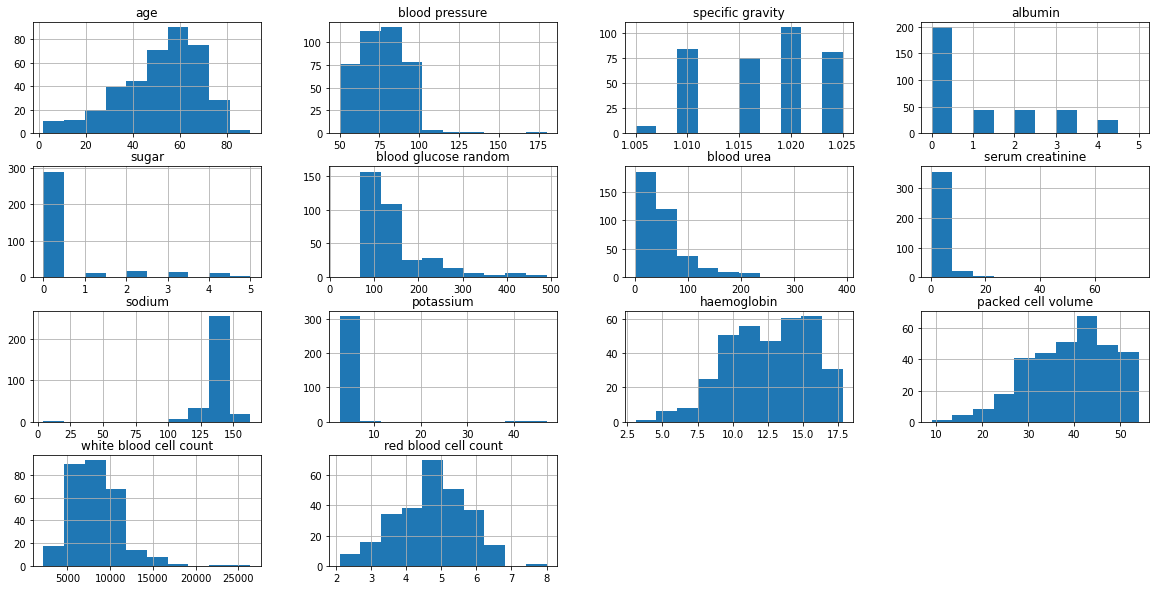

In [342]:
#Let's see the distribution of numerical values : Method 1
df[num_col].hist(figsize=(20,10))
plt.show()

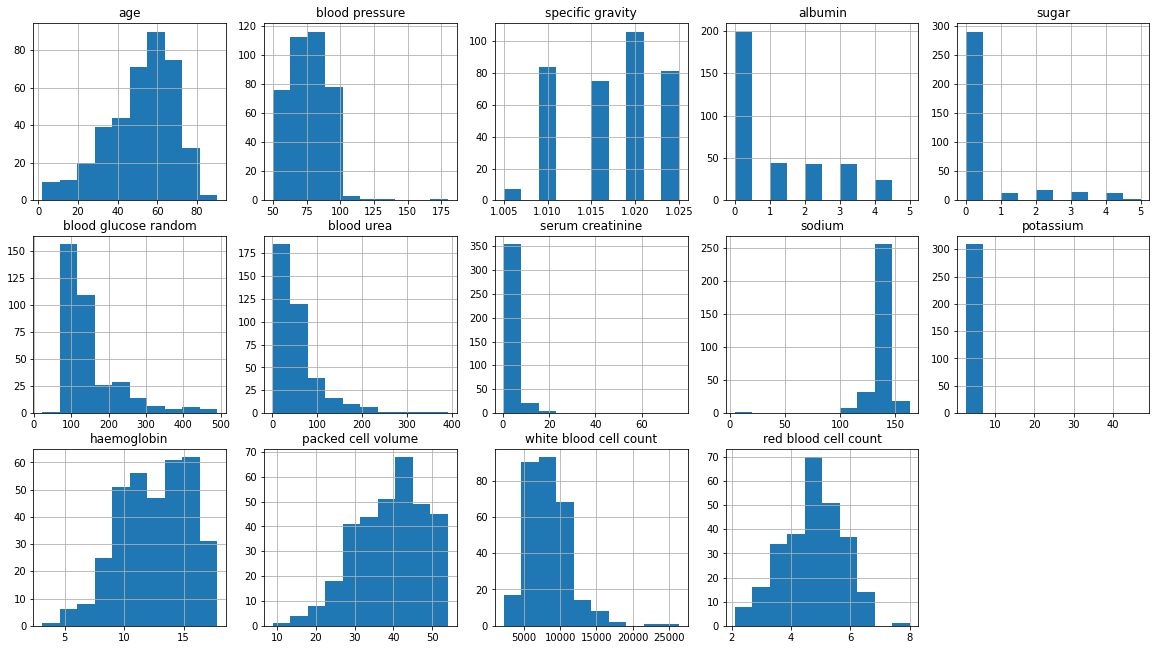

In [343]:
#Let's see the distribution of numerical values Method 2 : 
plt.figure(figsize=(20,15))
for i, feature in enumerate(num_col):
  plt.subplot(4,5, i+1)
  df[feature].hist()
  plt.title(feature)

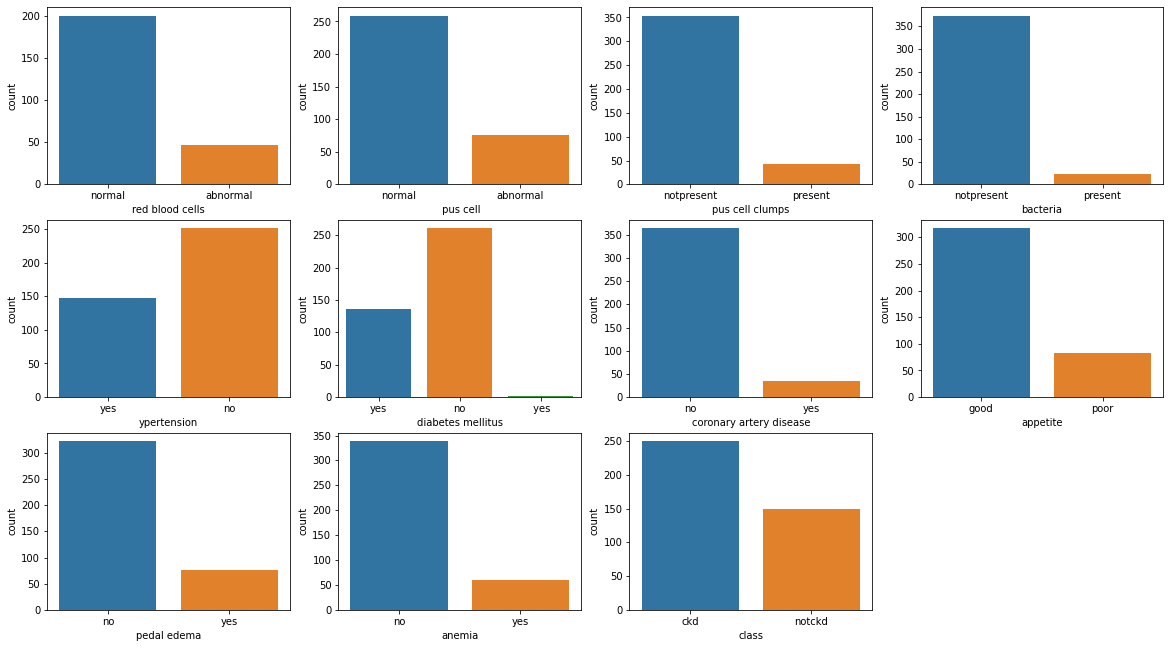

In [344]:
import warnings as wrg 
wrg.filterwarnings('ignore')
plt.figure(figsize=(20,15
                    ))
for i, feature in enumerate(cat_col):
  plt.subplot(4,4, i+1)
  sns.countplot(df[feature])
  #plt.title(feature)

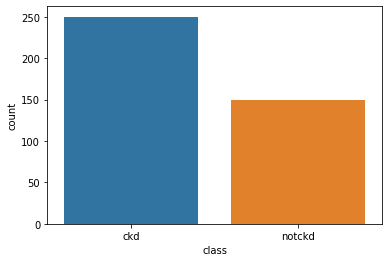

In [345]:
# Let's perform distribution graph on my class 
sns.countplot(df['class'])

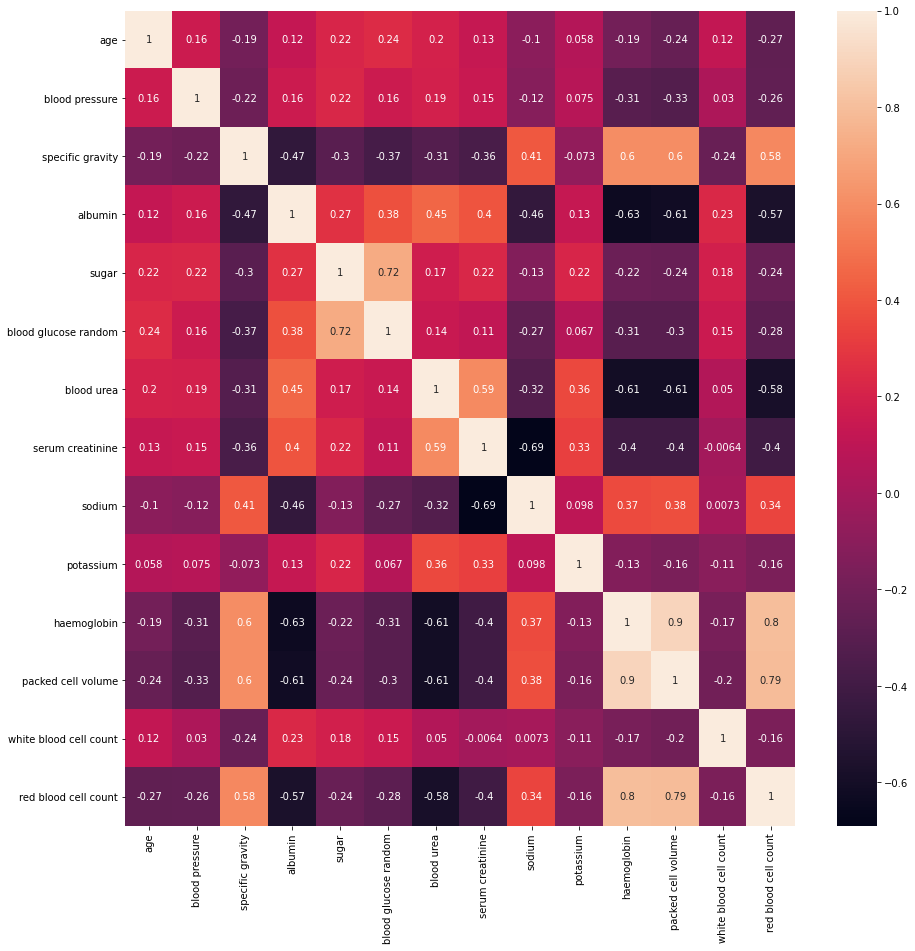

In [346]:
# Let's checck correlation : Method 1
plt.figure(figsize=(15,15))
df.corr
sns.heatmap(df.corr(), annot=True)

In [347]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [348]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [349]:
import plotly.express as px 
px.violin(df, y='red blood cell count', x='class', color='class')

In [350]:
## Problem statement 
## 1. find relationship between haemoglobin & packed cell volume
## 2. Analysing distribution of 'red_blood_count' chronic as well as non chronic
## 3. Automate your analysis..

In [351]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [352]:
# 1. Find relationship 
px.scatter(df, x='haemoglobin', y='packed cell volume')

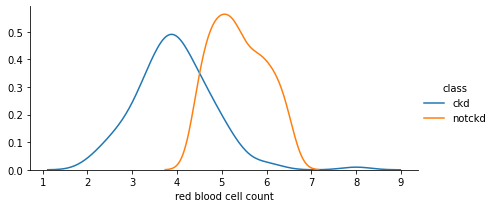

In [353]:
## 2. Analysing distribution of 'red_blood_count' chronic as well as non chronic
grid=sns.FacetGrid(df, hue='class', aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

In [354]:
# 3. Automate your analysis (violin)
def violin(col):
  fig=px.violin(df, y=col, x='class', color='class', box=True)
  return fig.show()

In [355]:
def scatters(col1, col2):
  fig=px.scatter(df, x=col1, y=col2, color='class')
  return fig.show()

In [356]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [357]:
def kde_plot(feature):
  grid=sns.FacetGrid(df, hue='class', aspect=2)
  grid.map(sns.kdeplot, feature)
  grid.add_legend()

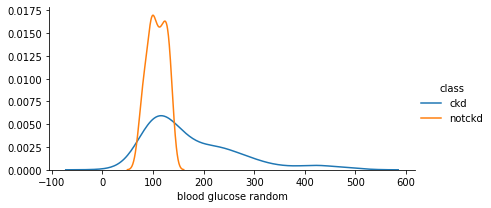

In [358]:
kde_plot('blood glucose random')

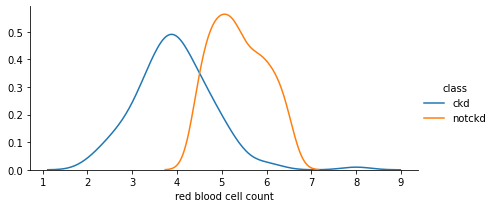

In [359]:
kde_plot('red blood cell count')

In [360]:
## Perform EDA

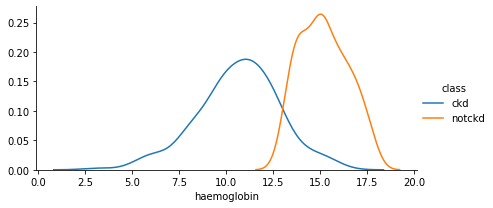

In [361]:
kde_plot('haemoglobin')

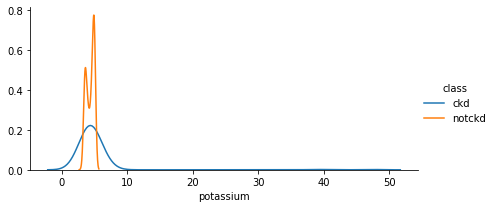

In [362]:
kde_plot('potassium')

-- Relationship between features

In [363]:
scatters('red blood cell count','packed cell volume')

In [364]:
scatters('red blood cell count','haemoglobin')

In [365]:
scatters('packed cell volume','haemoglobin')

In [366]:
violin('red blood cell count')

In [367]:
violin('packed cell volume')

In [368]:
scatters('red blood cell count','albumin')

---- Dealing with Null values 

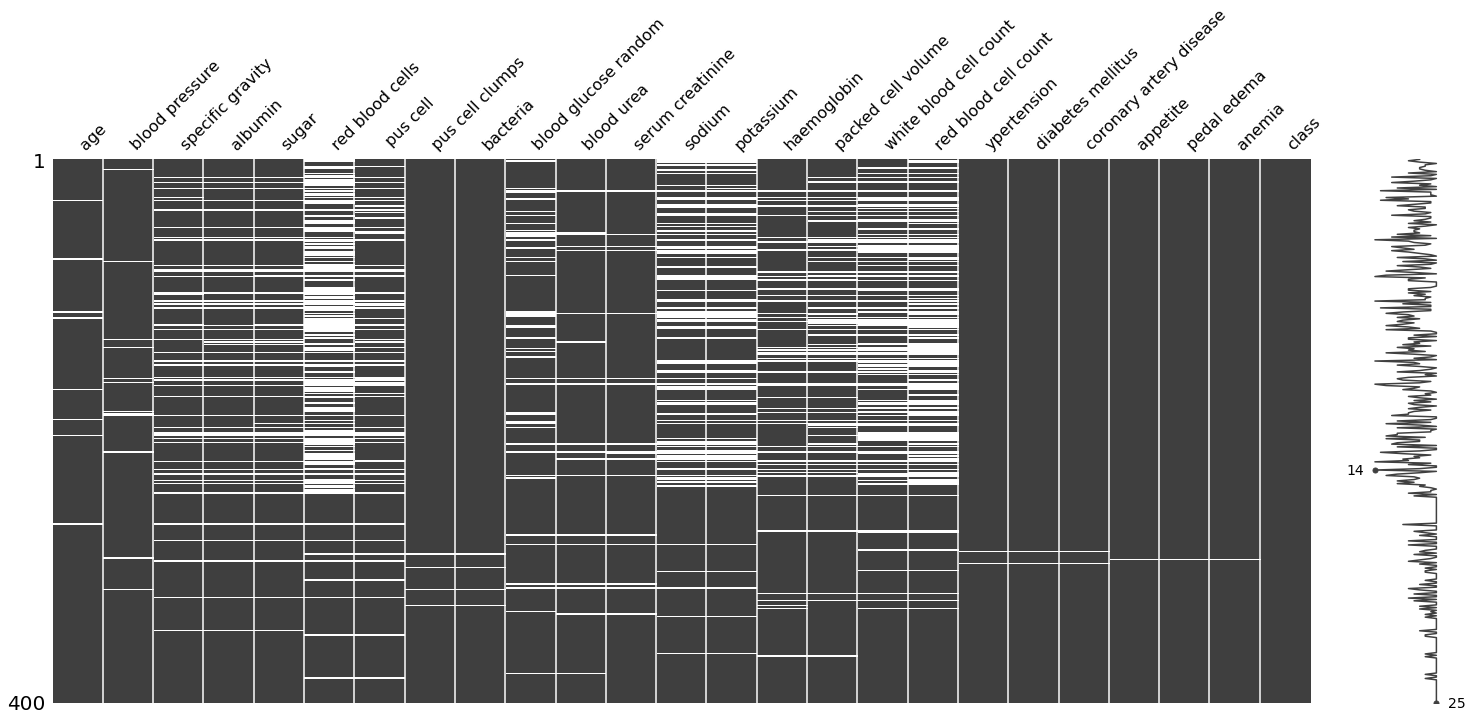

In [369]:
import missingno as msno
msno.matrix(df)

In [370]:
total_null_values=df.isnull().sum().sort_values(ascending=False)
total_null_values

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

In [371]:
#Get the %
pourcentage=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
pourcentage

red blood cells            0.3800
red blood cell count       0.3275
white blood cell count     0.2650
potassium                  0.2200
sodium                     0.2175
packed cell volume         0.1775
 pus cell                  0.1625
haemoglobin                0.1300
sugar                      0.1225
specific gravity           0.1175
albumin                    0.1150
blood glucose random       0.1100
blood urea                 0.0475
serum creatinine           0.0425
blood pressure             0.0300
age                        0.0225
bacteria                   0.0100
pus cell clumps            0.0100
ypertension                0.0050
diabetes mellitus          0.0050
coronary artery disease    0.0050
anemia                     0.0025
appetite                   0.0025
pedal edema                0.0025
class                      0.0000
dtype: float64

In [372]:
#Concat missing null values and pourcentage 
missing_data=pd.concat([total_null_values, pourcentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head()

,Total,Percentage
red blood cells,152,0.3800
red blood cell count,131,0.3275
white blood cell count,106,0.2650
potassium,88,0.2200
sodium,87,0.2175


In [373]:
data=df.copy()

In [374]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [375]:
def Random_value_Imputation(feature):
  random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
  random_sample.index=data[data[feature].isnull()].index
  data.loc[data[feature].isnull(), feature]=random_sample

In [376]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [377]:
for col in num_col:
  Random_value_Imputation(col)

In [378]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [379]:
data[cat_col].isnull().sum()

red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [383]:
Random_value_Imputation(' pus cell')

In [384]:
data[cat_col].isnull().sum()

red blood cells            152
 pus cell                    0
pus cell clumps              4
bacteria                     4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [385]:
Random_value_Imputation('red blood cells')

In [386]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            4
bacteria                   4
ypertension                2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

In [387]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [388]:
for col in cat_col:
  impute_mode(col)

In [389]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [390]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,136.0,4.8,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,76.0,18.0,0.8,138.0,3.5,11.3,38.0,6000.0,3.9,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,137.0,4.9,9.6,31.0,7500.0,3.5,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,140.0,4.9,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


-- Applying feature encoding 

In [392]:
for col in cat_col:
  print('{} has {} categories'.format(col,data[col].unique()))

red blood cells has ['normal' 'abnormal'] categories
 pus cell has ['normal' 'abnormal'] categories
pus cell clumps has ['notpresent' 'present'] categories
bacteria has ['notpresent' 'present'] categories
ypertension has ['yes' 'no'] categories
diabetes mellitus has ['yes' 'no' ' yes'] categories
coronary artery disease has ['no' 'yes'] categories
appetite has ['good' 'poor'] categories
pedal edema has ['no' 'yes'] categories
anemia has ['no' 'yes'] categories
class has ['ckd' 'notckd'] categories


In [393]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [394]:
for col in cat_col:
  data[col]=le.fit_transform(data[col])

In [395]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,136.0,4.8,15.4,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,76.0,18.0,0.8,138.0,3.5,11.3,38.0,6000.0,3.9,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,137.0,4.9,9.6,31.0,7500.0,3.5,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,140.0,4.9,11.6,35.0,7300.0,4.6,0,1,0,0,0,0,0


--- How to select the best feature for your model

In [396]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [397]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [398]:
X=data[ind_col]
y=data[dep_col]

In [399]:
X.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,136.0,4.8,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,76.0,18.0,0.8,138.0,3.5,11.3,38.0,6000.0,3.9,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,137.0,4.9,9.6,31.0,7500.0,3.5,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,140.0,4.9,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


In [400]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [401]:
ordered_rank_features=SelectKBest(score_func=chi2, k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [402]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7f27bfe3e050>)

In [403]:
ordered_feature.scores_

array([1.10611513e+02, 7.45831971e+01, 5.75164965e-03, 2.26171524e+02,
       1.08422939e+02, 8.96020513e+00, 1.36334398e+01, 2.52000000e+01,
       1.32000000e+01, 2.48934603e+03, 2.34694165e+03, 3.70138805e+02,
       2.77267885e+01, 5.22238923e+00, 1.26160911e+02, 3.23399075e+02,
       1.24585779e+04, 2.03868417e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [404]:
datascores=pd.DataFrame(ordered_feature.scores_, columns=['Score'])

In [405]:
datascores

,Score
0,110.611513
1,74.583197
2,0.005752
3,226.171524
4,108.422939
5,8.960205
6,13.633440
7,25.200000
8,13.200000
9,2489.346028


In [407]:
dfcols=pd.DataFrame(X.columns)
dfcols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [408]:
features_rank=pd.concat([dfcols, datascores], axis=1)
features_rank

,0,Score
0,age,110.611513
1,blood pressure,74.583197
2,specific gravity,0.005752
3,albumin,226.171524
4,sugar,108.422939
5,red blood cells,8.960205
6,pus cell,13.633440
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2489.346028


In [410]:
features_rank.columns=['features','Score']
features_rank

,features,Score
0,age,110.611513
1,blood pressure,74.583197
2,specific gravity,0.005752
3,albumin,226.171524
4,sugar,108.422939
5,red blood cells,8.960205
6,pus cell,13.633440
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2489.346028


In [411]:
#Top 10 features 
features_rank.nlargest(10, 'Score')

,features,Score
16,white blood cell count,12458.577874
9,blood glucose random,2489.346028
10,blood urea,2346.941648
11,serum creatinine,370.138805
15,packed cell volume,323.399075
3,albumin,226.171524
14,haemoglobin,126.160911
0,age,110.611513
4,sugar,108.422939
18,ypertension,88.200000


In [412]:
selected_columns=features_rank.nlargest(10, 'Score')['features'].values
selected_columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [413]:
X_new=data[selected_columns]
X_new.head()

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,age,sugar,ypertension
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,76.0,18.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,51.0,0.0,0


In [414]:
len(X_new)

400

In [415]:
X_new.shape

(400, 10)

--- Build a Cross-validated Model & Predict & Check accuracy or your model

In [417]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_new, y, random_state=0, test_size=0.25)

In [418]:
print(X_train.shape)

(300, 10)


In [420]:
print(X_test.shape)

(100, 10)


In [421]:
#Check if we have imbalanced data 
y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

In [422]:
from xgboost import XGBClassifier

In [423]:
params={
    'learning_rate':[0.05,0.20,0.25],
    'max_depth':[5,8,10],
    'min_child_weigh':[1,3,5,7],
    'gamma':[0.0, 0.1,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
}

In [424]:
from sklearn.model_selection import RandomizedSearchCV

In [425]:
classifier_xbg=XGBClassifier()

In [426]:
random_search=RandomizedSearchCV(classifier_xbg, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [427]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [428]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weigh=5, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [429]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.4,
 'learning_rate': 0.2,
 'max_depth': 10,
 'min_child_weigh': 5}

In [430]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weigh=5, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [431]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weigh=5, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [433]:
y_pred=classifier.predict(X_test)

In [434]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [435]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [436]:
confusion_matrix(y_test, y_pred)

array([[61,  1],
       [ 1, 37]])

In [438]:
accuracy_score(y_test, y_pred)

0.98